### Importing the libraries

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import seaborn as sns 
from scipy.optimize import curve_fit
from IPython.display import display, HTML

%matplotlib inline


### Loading the dataset

In [2]:
order_products_train = pd.read_csv("order_products__train.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
sample_submission = pd.read_csv("sample_submission.csv")


### Check the size of the 'orders' and 'products' files

In [3]:
print(orders.shape)
print(products.shape) 

(3421083, 7)
(49688, 4)


### There are around 3.5 million orders and around 50000 products

### We check the order information

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### Number of orders per customer from max to min

In [5]:
sns.set_style('dark')
customer_no = orders.groupby("user_id", as_index = False)["order_number"].max() 
customer_no

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
...,...,...
206204,206205,4
206205,206206,68
206206,206207,17
206207,206208,50


Text(0.5, 1.0, 'Number of Orders per Customer')

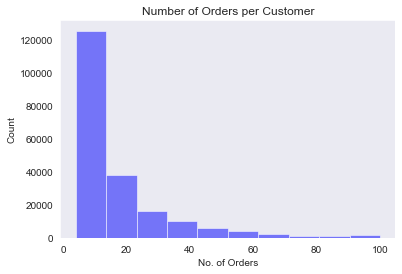

In [6]:
num_bins = 10
n, bins, patches = plt.hist(customer_no["order_number"] , num_bins, color='blue', alpha=0.5)

plt.xlabel("No. of Orders")
plt.ylabel("Count")
plt.title("Number of Orders per Customer")

### Check the statistics of the customer data

In [7]:
## MEAN

mean_value = customer_no["order_number"].mean()
mean_value

16.590367054784224

In [8]:
## Standard Deviation

std_deviation = customer_no["order_number"].std()
std_deviation

16.65477350115558

### What are the most frequently purchased products in the dataset ?
### OR
### What products do consumers buy most often ?

In [9]:
## Merging the train and prior datasets

t_p = order_products_train.append(order_products_prior,ignore_index = True)
prod = t_p.groupby("product_id",as_index = False)["order_id"].count() 

### Check the total number of products present in the dataset (Train + Prior)

In [10]:
prod

,product_id,order_id
0,1,1928
1,2,94
2,3,283
3,4,351
4,5,16
...,...,...
49680,49684,9
49681,49685,49
49682,49686,127
49683,49687,14


In [11]:
top = 20
product_Count = prod.sort_values("order_id",ascending = False)
df1 = product_Count.iloc[0:top,:]
df1 = df1.merge(products,on = "product_id")
display(df1.loc[:,["product_name"]])

,product_name
0,Banana
1,Bag of Organic Bananas
2,Organic Strawberries
3,Organic Baby Spinach
4,Organic Hass Avocado
5,Organic Avocado
6,Large Lemon
7,Strawberries
8,Limes
9,Organic Whole Milk


### By finding the most frequently purchased products we make the following observations 

#### 1) Produce has the most demand and consumers tend to buy produce more often. This could be because produce consists of perishable items.
#### 2) People buy organic food, despite the fact that it is expensive

### How many products does each department have ?

In [12]:
x = pd.merge(left=products, right=departments, how='left')
lists = pd.merge(left = x, right=aisles, how='left')
lists 

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,alcohol,spirits
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen,frozen vegan vegetarian
49685,49686,Artisan Baguette,112,3,bakery,bread
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,pets,cat food care


In [13]:
# Count the total number of products present in each department
group_list = lists.groupby("department")["product_id"].aggregate({'Total_products': 'count'}) 
group_list


C:\Users\Sanika\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,Total_products
department,
alcohol,1054
babies,1081
bakery,1516
beverages,4365
breakfast,1115
bulk,38
canned goods,2092
dairy eggs,3449
deli,1322


### We try to explore the total number of products present in each department in a descending order

In [29]:
final = group_list.reset_index() 
final.sort_values(by='Total_products', ascending=False, inplace=True)
final

,department,Total_products
17,personal care,6563
20,snacks,6264
16,pantry,5371
3,beverages,4365
10,frozen,4007
7,dairy eggs,3449
11,household,3085
6,canned goods,2092
9,dry goods pasta,1858
19,produce,1684


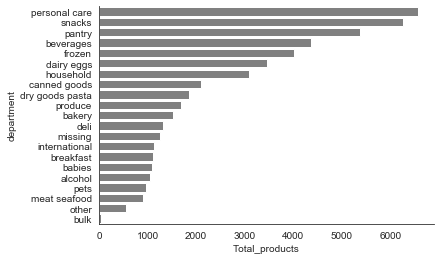

In [31]:
sns.set_style('white') 
ax = sns.barplot(x="Total_products", y="department", data=final,color = 'gray' )
#fig, ax = plt.subplots()

r = ax.spines["right"].set_visible(False)
#l = ax.spines["left"].set_visible(False)
t = ax.spines["top"].set_visible(False)



### We make the following observations -

#### 1) Personal care has the maximum number of products. This could be because personal care has many sub-categories like health-care items, cosmetics, deodrants, skin care products, bathroom essentials, etc. All these sub-categories consist of a huge variety of products and hence the count is maximum.

#### 2) Bulk department has the least number of products. This could include items such as large household furniture or goods which require special handling and perhaps the demand for such items on Instacart is less. Thats the reason it has very few items as consumers prefer to buy such items from a store.

In [16]:
my_range=list(range(1,len(final.index)+1))

### We also plot and observe a bubble plot for the products in each department

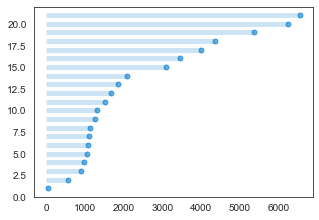

In [17]:
fig, ax = plt.subplots(figsize=(5,3.5))
plt.hlines(y=my_range, xmin=0, xmax=final['Total_products'], color='#007acc', alpha=0.2, linewidth=5)
plt.plot(final['Total_products'], my_range, "o", markersize=5, color='#007acc', alpha=0.6)

### Check the order_products_prior and order_products_train dataset

In [18]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [19]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [21]:
order_products_prior = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_prior.head() 

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [22]:
order_products_prior = pd.merge(order_products_prior, aisles, on='aisle_id', how='left')
order_products_prior.head() 

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [24]:
order_products_prior = pd.merge(order_products_prior, departments, on='department_id', how='left')
order_products_prior.head() 

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


### Create a new dataframe consisting of 'add_to_cart_order' and 'reordered' products from the prior set

In [25]:
new_df = pd.DataFrame({'Add_to_cart': order_products_prior.add_to_cart_order, 'Reordered':order_products_prior.reordered })
new_df

,Add_to_cart,Reordered
0,1,1
1,2,1
2,3,0
3,4,1
4,5,0
...,...,...
32434484,6,1
32434485,7,0
32434486,8,0
32434487,9,1


### Which department has the highest and lowest number of reordered items ?


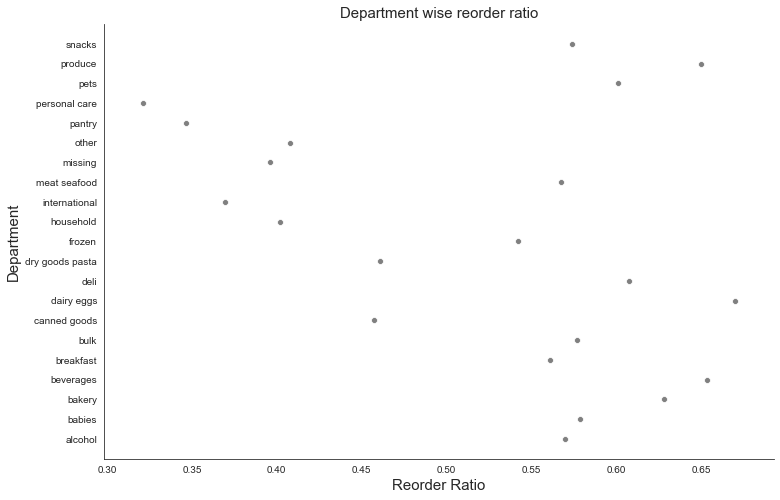

In [33]:
## Group the departments by the reordered items . Take an average of reordered per department to find the department 
## with the maximum number of reordered items

df2 = order_products_prior.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.set_style('white')

ax1 = sns.scatterplot(df2['reordered'].values,df2['department'].values , color = 'gray')
plt.ylabel('Department', fontsize=15)
plt.xlabel('Reorder Ratio' , fontsize=15)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='horizontal')
r = ax1.spines["right"].set_visible(False)
t = ax1.spines["top"].set_visible(False)
plt.show() 

### We conclude that

#### 1) Personal care department has the lowest number of reordered items or the lowest reordered ratio.
#### 2) Dairy eggs have department have the highest number of reordered items or the highest reordered ratio.